## Load parquet

In [2]:
%matplotlib widget
%matplotlib inline

In [3]:

import pandas as pd

import matplotlib.pyplot as plt
import pandas_ta as ta

In [4]:
df = pd.read_parquet("data.parquet")

In [5]:
df.head()

,name,id,figi,ts,open_price,close_price,high_price,low_price,volume
0,JPMorgan,1,BBG000DMBXR2,2018-01-23 21:49:00+00:00,114.02,114.02,114.02,114.02,6.0
1,JPMorgan,1,BBG000DMBXR2,2018-01-23 21:39:00+00:00,114.02,114.02,114.02,114.02,10.0
2,JPMorgan,1,BBG000DMBXR2,2018-01-23 20:59:00+00:00,114.25,114.23,114.26,114.17,27504.0
3,JPMorgan,1,BBG000DMBXR2,2018-01-23 20:58:00+00:00,114.19,114.24,114.26,114.19,8531.0
4,JPMorgan,1,BBG000DMBXR2,2018-01-23 20:57:00+00:00,114.24,114.19,114.24,114.18,7213.0


In [6]:
df.groupby("name").count()

,id,figi,ts,open_price,close_price,high_price,low_price,volume
name,,,,,,,,
AT&T,14394,14394,14394,14394,14394,14394,14394,14394
AbbVie,14576,14576,14576,14576,14576,14576,14576,14576
Accenture,13772,13772,13772,13772,13772,13772,13772,13772
Activision Blizzard,14617,14617,14617,14617,14617,14617,14617,14617
Adobe,15235,15235,15235,15235,15235,15235,15235,15235
...,...,...,...,...,...,...,...,...
Xylem,11205,11205,11205,11205,11205,11205,11205,11205
Zimmer Biomet Holdings,11682,11682,11682,11682,11682,11682,11682,11682
Zions Bancorporation,13838,13838,13838,13838,13838,13838,13838,13838


## Analyze single stock

### Create dataset with sliding averages

In [7]:
sliding_window_df = df[df["name"] == "VEON"]

## Exclude 1-st hour and last hour

In [8]:
sliding_window_df.head()

,name,id,figi,ts,open_price,close_price,high_price,low_price,volume
112739,VEON,396,BBG000QCW561,2018-01-23 21:00:00+00:00,3.93,3.93,3.93,3.93,446967.0
112740,VEON,396,BBG000QCW561,2018-01-23 20:59:00+00:00,3.93,3.94,3.94,3.93,41293.0
112741,VEON,396,BBG000QCW561,2018-01-23 20:58:00+00:00,3.93,3.93,3.94,3.93,11219.0
112742,VEON,396,BBG000QCW561,2018-01-23 20:57:00+00:00,3.94,3.93,3.94,3.93,10.0
112743,VEON,396,BBG000QCW561,2018-01-23 20:56:00+00:00,3.94,3.94,3.94,3.94,10.0


In [9]:
def preprocess_data(df):
    # Sort values with ts
    df = df.sort_values("ts")
    # Reset index
    df = df.reset_index(drop=True)

    # Add MACD
    df.ta.macd(append=True)

    # Add RSI
    df.ta.rsi(append=True)

    # Rename columns
    df = df.rename(columns={
        "MACD_12_26_9": "MACD",
        "MACDs_12_26_9": "MACDs",
        "MACDh_12_26_9": "MACDh",
        "RSI_14": "RSI"})

    # Calc RSI signals
    RSI_oversold_threshold = 30
    RSI_overbouht_threshold = 70

    df["RSI_oversold"] = df["RSI"] <= RSI_oversold_threshold
    df["RSI_overbought"] = df["RSI"] >= RSI_overbouht_threshold

    df["MACD_crossover"] = (df["MACDh"] > 0) & (df["MACDh"].shift() <= 0)
    df["MACD_crossunder"] = (df["MACDh"] <= 0) & (df["MACDh"].shift() > 0)

    return df

In [10]:
sliding_window_df = preprocess_data(sliding_window_df)
sliding_window_df.head()

,name,id,figi,ts,open_price,close_price,high_price,low_price,volume,MACD,MACDh,MACDs,RSI,RSI_oversold,RSI_overbought,MACD_crossover,MACD_crossunder
0,VEON,396,BBG000QCW561,2018-01-23 14:30:00+00:00,3.94,3.94,3.94,3.94,7986.0,NaN,NaN,NaN,NaN,False,False,False,False
1,VEON,396,BBG000QCW561,2018-01-23 14:31:00+00:00,3.94,3.94,3.94,3.94,600.0,NaN,NaN,NaN,NaN,False,False,False,False
2,VEON,396,BBG000QCW561,2018-01-23 14:36:00+00:00,3.93,3.93,3.94,3.93,29107.0,NaN,NaN,NaN,0.0,True,False,False,False
3,VEON,396,BBG000QCW561,2018-01-23 14:37:00+00:00,3.92,3.92,3.92,3.92,100.0,NaN,NaN,NaN,0.0,True,False,False,False
4,VEON,396,BBG000QCW561,2018-01-23 14:39:00+00:00,3.92,3.92,3.92,3.92,1000.0,NaN,NaN,NaN,0.0,True,False,False,False


Show MACD RSI

In [11]:
def color_zone(ax, points, alpha, color):
    start_point = 0
    end_point = 0
    for x in points:
        if start_point == 0:
            start_point = x
            end_point = x + 1
        else:
            if end_point == x:
                # Continue
                end_point += 1
            else:
                # Draw and reset
                ax.axvspan(start_point, end_point, alpha=alpha, color=color)
                start_point = 0
                end_point = 0
    
    if start_point != 0:
        # Draw and reset
        ax.axvspan(start_point, end_point, alpha=alpha, color=color)
        start_point = 0
        end_point = 0

In [12]:
def plot_candles(df):
    width=1
    width2=0.2

    pricesup = df[df["close_price"] >= df["open_price"]]
    pricesdown = df[df["close_price"] < df["open_price"]]

    plt.bar(pricesup.index, pricesup["close_price"] - pricesup["open_price"], width, bottom=pricesup["open_price"], color='g')
    plt.bar(pricesup.index, pricesup["high_price"] - pricesup["close_price"], width2, bottom=pricesup["close_price"], color='g')
    plt.bar(pricesup.index, pricesup["low_price"] - pricesup["open_price"], width2, bottom=pricesup["open_price"], color='g')

    plt.bar(pricesdown.index, pricesdown["close_price"] - pricesdown["open_price"], width, bottom=pricesdown["open_price"], color='r')
    plt.bar(pricesdown.index, pricesdown["high_price"] - pricesdown["close_price"], width2, bottom=pricesdown["close_price"], color='r')
    plt.bar(pricesdown.index, pricesdown["low_price"] - pricesdown["open_price"], width2, bottom=pricesdown["open_price"], color='r')
    plt.grid()

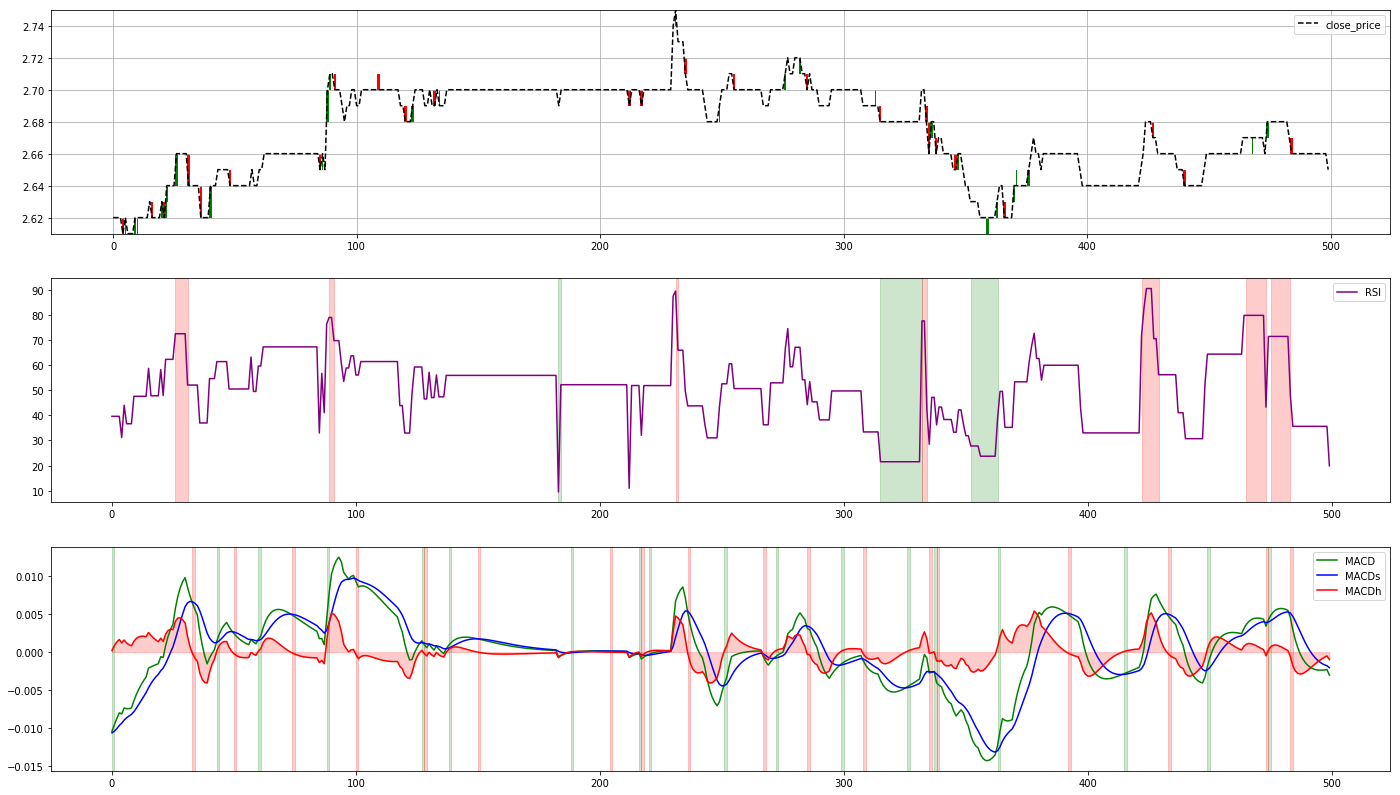

In [13]:
plot_df = sliding_window_df.iloc[1000:1500].reset_index()

plt.figure(figsize=(24,14))
plt.subplot(3, 1, 1)
plot_df["close_price"].plot(color="black", linestyle='--')
plot_candles(plot_df)
plt.legend()

plt.subplot(3, 1, 2)
ax1 = plot_df["RSI"].plot(color="purple")
# Show oversold zone
color_zone(ax1, plot_df[plot_df["RSI_oversold"]].index, 0.2, "green")
# Show overbought zone
color_zone(ax1, plot_df[plot_df["RSI_overbought"]].index, 0.2, "red")
plt.legend()

plt.subplot(3, 1, 3)
ax3 = plot_df["MACD"].plot(color="green")
plot_df["MACDs"].plot(ax=ax3,color="blue")
plot_df["MACDh"].plot(ax=ax3,color="red")
ax3.fill_between(plot_df.index, plot_df["MACDh"], alpha=0.2, color="red")
# Show crossover moments
for x in plot_df[plot_df["MACD_crossover"]].index:
    ax3.axvspan(x, x+1, alpha=0.2, color="green")      
# Show crossunder moments
for x in plot_df[plot_df["MACD_crossunder"]].index:
    ax3.axvspan(x, x+1, alpha=0.2, color="red")
plt.legend()

# Create manual bot

In [14]:
# Create dataset for bot
# Preprocess data
bot_df = preprocess_data(df[df["name"] == "VEON"])
# Select columns
bot_df = bot_df[["ts","open_price","close_price","high_price","low_price","volume","MACD","RSI"]]
bot_df.head()

,ts,open_price,close_price,high_price,low_price,volume,MACD,RSI
0,2018-01-23 14:30:00+00:00,3.94,3.94,3.94,3.94,7986.0,NaN,NaN
1,2018-01-23 14:31:00+00:00,3.94,3.94,3.94,3.94,600.0,NaN,NaN
2,2018-01-23 14:36:00+00:00,3.93,3.93,3.94,3.93,29107.0,NaN,0.0
3,2018-01-23 14:37:00+00:00,3.92,3.92,3.92,3.92,100.0,NaN,0.0
4,2018-01-23 14:39:00+00:00,3.92,3.92,3.92,3.92,1000.0,NaN,0.0


In [15]:
from bot import TradingBot

# Test bot
bot = TradingBot(stop_loss=0.02)

bot.reset()

for index, data in bot_df.iterrows():
    bot.process(data)

bot.profit * 100

-17.93419066638523

# Test bot on different stocks

In [16]:
def test_bot_profit(df):
    # Preprocess data
    bot_df = preprocess_data(df)
    # Select columns
    bot_df = bot_df[["ts","open_price","close_price","high_price","low_price","volume","MACD","RSI"]]

    # Create bot instance
    bot = TradingBot(stop_loss=0.02)
    # Reset bot
    bot.reset()
    # Run bot
    for index, data in bot_df.iterrows():
        bot.process(data)

    return bot.profit * 100

In [29]:
from joblib import Parallel, delayed, parallel_backend

jobs = []

def thread_func(stock_name, stock_df):
    # Check size of dataset
    if stock_df.shape[0] > 8 * 60:
        profit = test_bot_profit(stock_df)

        return {"name":stock_name,"profit":profit}
    
    return {}

with parallel_backend("multiprocessing", n_jobs=8):
    bot_profit_list = Parallel()(delayed(thread_func)(stock_name, stock_df) for stock_name, stock_df in df.groupby("name"))

bot_profit_df = pd.DataFrame(bot_profit_list).dropna()
bot_profit_df

,name,profit
0,AT&T,10.203525
1,AbbVie,3.214829
2,Accenture,0.294567
3,Activision Blizzard,4.444229
4,Adobe,21.586428
...,...,...
341,Xylem,5.374592
342,Zimmer Biomet Holdings,-0.310084
343,Zions Bancorporation,5.573314
344,Zoetis,15.868804


In [30]:
bot_profit_df.sort_values("profit")

,name,profit
312,VEON,-17.427307
306,United Airlines Holdings,-15.459791
50,BlackRock,-15.343983
283,Stanley Black & Decker,-13.530220
258,Qualcomm,-11.685132
...,...,...
151,Hess,22.852672
219,NRG Energy,24.233344
188,Lam Research,25.460361
324,WW Grainger,26.732704


In [31]:
bot_profit_df.describe()

,profit
count,343.000000
mean,2.658438
std,8.063081
min,-17.427307
25%,-2.792392
50%,1.932194
75%,6.185408
max,57.207853
